In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [7]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv #mismo csv

File ‘spam.csv’ already there; not retrieving.



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [13]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('%s tokens' % V)

7222 tokens


In [15]:
data_train = pad_sequences(sequences_train) #NxT
print(data_train.shape)

T = data_train.shape[1] #largo de sec

(3733, 121)


In [16]:
data_test = pad_sequences(sequences_test, maxlen=T)
print(data_test.shape)

(1839, 121)


In [0]:
D = 20 #embedding 

#misma CNN que use antes pero en 1d
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [18]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

r = model.fit(
  data_train,
  Ytrain,
  epochs=5,
  validation_data=(data_test, Ytest)
)

Epoch 1/5
117/117 [==============================] - 1s 9ms/step - loss: 0.4124 - accuracy: 0.8615 - val_loss: 0.3301 - val_accuracy: 0.8749
Epoch 2/5
117/117 [==============================] - 1s 7ms/step - loss: 0.1501 - accuracy: 0.9416 - val_loss: 0.0887 - val_accuracy: 0.9750
Epoch 3/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0933 - val_accuracy: 0.9755
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0148 - accuracy: 0.9968 - val_loss: 0.0955 - val_accuracy: 0.9766
Epoch 5/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0089 - accuracy: 0.9984 - val_loss: 0.1104 - val_accuracy: 0.9782


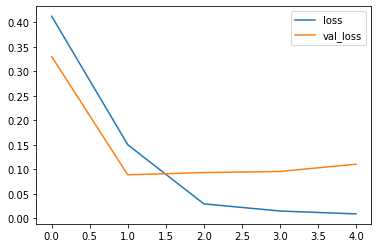

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

#el val_loss empieza a empeorar nose porque

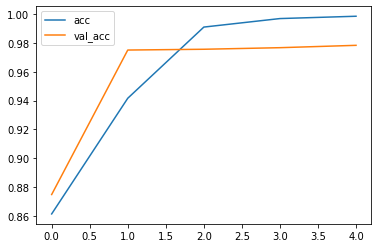

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#encuentra las correlaciones entre palabras pero es un poco menos efectivo, de todas maneras los ejemplos que no clasifica bien son bastante raros asique no esta mal para nada.